# Initial example 

## example 1
Three alminium plate connected thermal condactance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chill import Chill

In [2]:
c = Chill()

In [3]:
# Alminium 1m * 1m * 1 cm
rho = 2700
c_p = 900
A = 0.1 # m^2
h = 0.01 # 1 cm
C = rho * A * h * c_p  # J/K

h_c = 100
R = 1/(A*h_c)

In [4]:
c.define_node?

Signature: c.define_node(temperature: float, capacity: float, name: str = '') -> chill.core.Node
Docstring:
Defines a new node and adds it to the simulation.

Args:
    temperature (float): Initial temperature of the node [K].
    capacity (float): Thermal capacity of the node [K/J].
    name (str, optional): Name of the node. Defaults to an empty string.

Returns:
    Node: The created node object.
File:      ~/chill/chill/core.py
Type:      method


In [5]:
node0 = c.define_node(500, C)
node1 = c.define_node(300, C)
node2 = c.define_node(300, C)

In [6]:
c.define_thermal_conduction?

Signature:
c.define_thermal_conduction(
    node0: chill.core.Node,
    node1: chill.core.Node,
    conductance: float,
    name: str = '',
) -> None
Docstring:
Defines a thermal conduction edge between two nodes.

Args:
    node0 (Node): One end of the conduction edge.
    node1 (Node): The other end of the conduction edge.
    conductance (float): Thermal conductance.
    name (str, optional): Name of the edge. Defaults to an empty string.
File:      ~/chill/chill/core.py
Type:      method


In [7]:
c.define_thermal_conduction(node0, node1, R)
c.define_thermal_conduction(node1, node2, R)

In [8]:
c.setup()

In [9]:
c.execute?

Signature: c.execute(total_time: float, record_interval: float = 0) -> None
Docstring:
execute the simulation for a specified time.
:param total_time: simulation time
:param record_interval: recording interval
File:      ~/chill/chill/core.py
Type:      method


In [10]:
%%time
c.execute(6000, 1)

CPU times: user 17.6 ms, sys: 13.9 ms, total: 31.6 ms
Wall time: 23.2 ms


In [11]:
temp = np.array(c.temperatures_history)
time = np.array(c.times_history)

Text(0, 0.5, 'Temperature [K]')

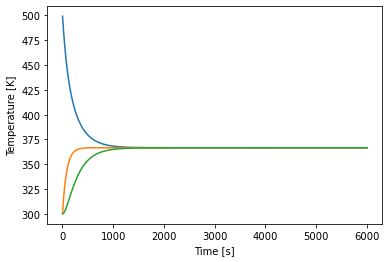

In [12]:
plt.plot(time, temp[:, 0])
plt.plot(time, temp[:, 1])
plt.plot(time, temp[:, 2])
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')

In [13]:
assert abs(c.temperatures[0] - c.temperatures[1]) < 1.e-3
assert abs(c.temperatures[1] - c.temperatures[2]) < 1.e-3

# example 2
Define heater and radiator 

In [14]:
c = Chill()
heater = c.define_node(temperature=300, capacity=np.inf, name='heater')
plate = c.define_node(temperature=300, capacity=C, name='plate')
radiator = c.define_node(temperature=300, capacity=C, name='radiator')
ambient = c.define_node(temperature=300, capacity=np.inf, name='ambient')

c.define_thermal_input(heater, plate, 100)
c.define_thermal_conduction(plate, radiator, R)
E_G, epsilon = 1., 1.
stefan_boltzman_constant = 5.670374419e-8
c.define_thermal_radiation(radiator, ambient, E_G*epsilon*stefan_boltzman_constant*A)
c.setup()

In [15]:
%%time
c.execute(100000, 100)

CPU times: user 45.8 ms, sys: 3.22 ms, total: 49 ms
Wall time: 49.5 ms


Text(0, 0.5, 'Temperature [K]')

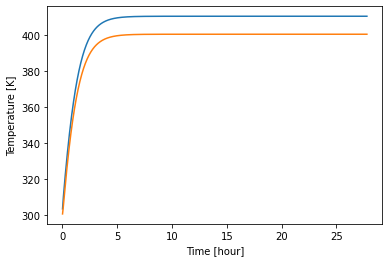

In [16]:
temp = np.array(c.temperatures_history)
time = np.array(c.times_history) / 60. /60
#plt.plot(time, temp[:, 0])
plt.plot(time, temp[:, 1])
plt.plot(time, temp[:, 2])
#plt.plot(time, temp[:, 3])
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')